In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
saws_df = wrangle.wrangle_saws()

In [3]:
saws_df

,zipcode,location,year_month,gallons_consumed
Record #,,,,
274262,78229,ACCOLON DR,17-JAN,6733
274263,78229,ACCOLON DR,17-JAN,5237
274264,78229,ACCOLON DR,17-JAN,2992
274265,78229,ACCOLON DR,17-JAN,0
274266,78229,ACCOLON DR,17-JAN,4489
...,...,...,...,...
545917,78229,WOODLAKE DR,20-DEC,748
545918,78229,WOODLAKE DR,20-DEC,14214
545919,78229,WOODLAKE DR,20-DEC,0


In [4]:
sound_df = wrangle.wrangle_sound()
sound_df = sound_df.set_index('DateTime')
sound_df = sound_df.sort_index()

In [5]:
sound_df

,NoiseLevel_db,noise_level
DateTime,,
2021-04-20 00:00:43,63,Moderate
2021-04-20 00:07:45,58,Moderate
2021-04-20 00:08:26,58,Moderate
2021-04-20 00:10:43,59,Moderate
2021-04-20 00:17:46,55,Moderate
...,...,...
2021-07-08 23:56:14,66,Moderate
2021-07-08 23:56:14,65,Moderate
2021-07-08 23:59:13,66,Moderate


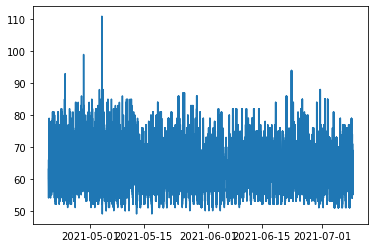

In [6]:
plt.plot(sound_df.index, sound_df.NoiseLevel_db)

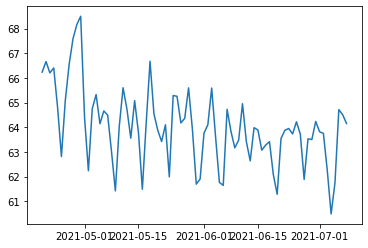

In [7]:
plt.plot(sound_df.resample('D').mean())

[Text(0.5, 1.0, 'Average Noise Level by Hour'),
 Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Decibels')]

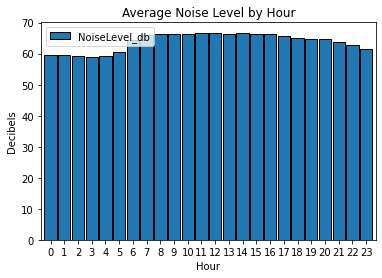

In [8]:
woosh = sound_df.resample('H').mean()
ax = woosh.groupby(woosh.index.hour).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Hour', xlabel='Hour', ylabel='Decibels')

[Text(0.5, 1.0, 'Average Noise Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Decibels')]

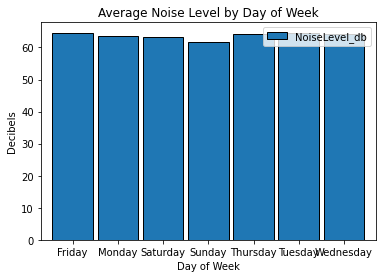

In [9]:
ax = sound_df.groupby(sound_df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Day of Week', xlabel='Day of Week', ylabel='Decibels')

In [10]:
flood_df = wrangle.clean_flood()
flood_df = flood_df.set_index('datetime')

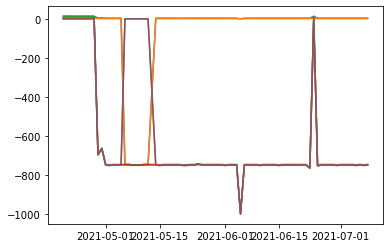

In [11]:
plt.plot(flood_df.resample('D').mean())

In [12]:
flood_df

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,
2021-05-20 00:11:55,13.188976,4.0200,13.500656,4.115,0.311680,0.0950
2021-05-20 00:26:55,13.254593,4.0400,13.500656,4.115,0.246063,0.0750
2021-05-20 00:41:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 00:56:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 01:11:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
...,...,...,...,...,...,...
2021-07-08 23:35:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:40:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:45:00,0.233300,0.0711,-999.000000,-999.000,-999.233300,-999.0711


In [13]:
air_df = wrangle.clean_air()
air_df.datetime = pd.to_datetime(air_df.datetime)
air_df = air_df.set_index('datetime')
air_df = air_df.sort_index()
air1_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]

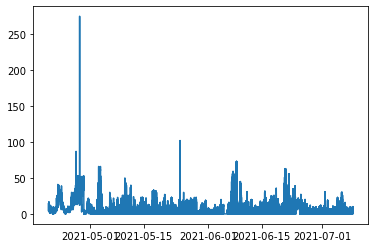

In [14]:
plt.plot(air1_df.index, air1_df.Pm1_0)

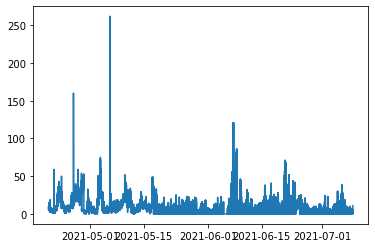

In [15]:
air25_df = air_df[(air_df['Pm2_5'] < 500) & (air_df['Pm2_5'] > -50)]
plt.plot(air25_df.index, air25_df.Pm2_5)

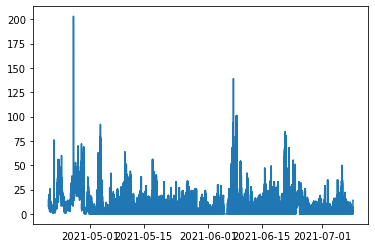

In [16]:
air10_df = air_df[(air_df['Pm10'] < 500) & (air_df['Pm10'] > -50)]
plt.plot(air10_df.index, air10_df.Pm10)

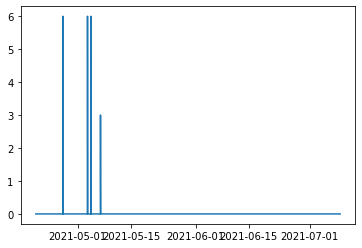

In [17]:
plt.plot(air_df.index, air_df.SO2)

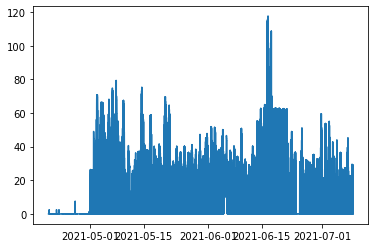

In [18]:
plt.plot(air_df.index, air_df.O3)

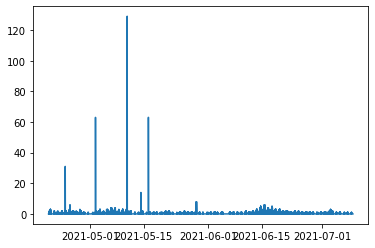

In [19]:
plt.plot(air_df.index, air_df.CO)

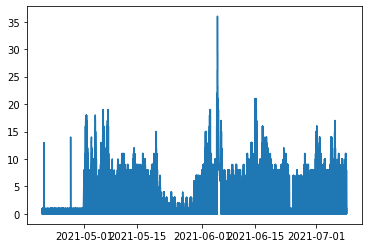

In [20]:
plt.plot(air_df.index, air_df.NO2)

In [21]:
weather_df = wrangle.wrangle_weather()

In [22]:
weather_df.dewpoint_celsius.isna().sum()

0

In [23]:
weather_df['wind'] = weather_df['wind'].str.extract('(\d+)', expand=False)
weather_df['visibility'] = weather_df['visibility'].str.extract('(\d+)', expand=False)
weather_df['wind'] = weather_df['wind'].fillna(0)
weather_df['wind'] = weather_df['wind'].apply(lambda x: int(x))
weather_df['visibility'] = weather_df['visibility'].apply(lambda x: int(x))

In [24]:
weather_df

,datetime,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,time,date,weather,wind,visibility
DateTime,,,,,,,,,,,,
2021-04-20,2021-04-20 00:03:06,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,Passing clouds.,8,10
2021-04-20,2021-04-20 00:07:47,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,Passing clouds.,8,10
2021-04-20,2021-04-20 00:16:47,16.0,62.0,49.0,5.281568,41.506822,979.0,11:51 PM,4/19/2021,Passing clouds.,8,10
2021-04-20,2021-04-20 00:27:06,16.0,61.0,50.0,5.572908,42.031234,979.0,11:51 PM,4/19/2021,Passing clouds.,8,10
2021-04-20,2021-04-20 00:03:06,17.0,62.0,48.0,5.901560,42.622809,980.0,11:51 PM,4/19/2021,Passing clouds.,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-09,2021-07-08 23:35:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,Rain. Fog.,9,3
2021-07-09,2021-07-08 23:40:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,Rain. Fog.,9,3
2021-07-09,2021-07-08 23:45:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,Rain. Fog.,9,3


In [25]:
flood_df

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,
2021-05-20 00:11:55,13.188976,4.0200,13.500656,4.115,0.311680,0.0950
2021-05-20 00:26:55,13.254593,4.0400,13.500656,4.115,0.246063,0.0750
2021-05-20 00:41:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 00:56:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 01:11:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
...,...,...,...,...,...,...
2021-07-08 23:35:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:40:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:45:00,0.233300,0.0711,-999.000000,-999.000,-999.233300,-999.0711


In [26]:
sound_df

,NoiseLevel_db,noise_level
DateTime,,
2021-04-20 00:00:43,63,Moderate
2021-04-20 00:07:45,58,Moderate
2021-04-20 00:08:26,58,Moderate
2021-04-20 00:10:43,59,Moderate
2021-04-20 00:17:46,55,Moderate
...,...,...
2021-07-08 23:56:14,66,Moderate
2021-07-08 23:56:14,65,Moderate
2021-07-08 23:59:13,66,Moderate


In [27]:
air_df

,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,time,hour,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
datetime,,,,,,,,,,,,,,,,,,,,,
2021-04-20 00:00:43,7,6,8,0,0.0,0,0,None,2021-04-20,00:00:43,0,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:07:45,15,10,15,0,0.0,0,1,no2,2021-04-20,00:07:45,0,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:08:26,8,7,9,0,0.0,0,0,None,2021-04-20,00:08:26,0,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:10:43,5,8,11,0,0.0,0,0,None,2021-04-20,00:10:43,0,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:17:46,4,8,10,0,0.0,0,1,no2,2021-04-20,00:17:46,0,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-08 23:56:14,8,8,10,0,0.0,0,0,None,2021-07-08,23:56:14,23,3,Good,0.023188,Good,Good,3.906087,Good,Good,4.773333,Good
2021-07-08 23:56:14,10,11,14,0,0.0,0,1,no2,2021-07-08,23:56:14,23,3,Good,0.023188,Good,Good,3.906087,Good,Good,4.773333,Good
2021-07-08 23:59:13,9,6,8,0,0.0,0,0,None,2021-07-08,23:59:13,23,3,Good,0.023188,Good,Good,3.906087,Good,Good,4.773333,Good


In [28]:
weather_day_df = weather_df.resample('D', on='datetime').mean()
flood_day_df = flood_df.resample('D').mean()
sound_day_df = sound_df.resample('D').mean()
air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])

In [29]:
air_day_df

,Pm1_0,Pm2_5,Pm10,CO
datetime,,,,
2021-04-20,5.193732,8.022792,7.324786,0.299145
2021-04-21,2.968750,3.616477,4.460227,0.144886
2021-04-22,16.866477,18.247159,22.963068,0.056818
2021-04-23,18.123563,19.209770,23.916667,0.166667
2021-04-24,3.804533,4.458924,51.232295,0.405099
...,...,...,...,...
2021-07-04,5.982609,6.902029,8.548986,0.069565
2021-07-05,10.007536,10.895072,13.280580,0.069565
2021-07-06,9.242319,10.684638,12.732174,0.022609


In [30]:
air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)

In [31]:
series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']

In [32]:
series2_5

datetime
2021-04-20                         Hazardous
2021-04-21                         Unhealthy
2021-04-22    Unhealthy for Sensitive Groups
2021-04-23    Unhealthy for Sensitive Groups
2021-04-24                          Moderate
                           ...              
2021-07-04                          Moderate
2021-07-05                          Moderate
2021-07-06    Unhealthy for Sensitive Groups
2021-07-07                              Good
2021-07-08                              Good
Freq: D, Name: most_hazardous_pm2.5_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [33]:
series10

datetime
2021-04-20        Good
2021-04-21    Moderate
2021-04-22    Moderate
2021-04-23    Moderate
2021-04-24        Good
                ...   
2021-07-04        Good
2021-07-05        Good
2021-07-06        Good
2021-07-07        Good
2021-07-08        Good
Freq: D, Name: most_hazardous_pm10_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [34]:
seriesCO

datetime
2021-04-20         Good
2021-04-21         Good
2021-04-22         Good
2021-04-23         Good
2021-04-24    Hazardous
                ...    
2021-07-04         Good
2021-07-05         Good
2021-07-06         Good
2021-07-07         Good
2021-07-08         Good
Freq: D, Name: most_hazardous_CO_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [35]:
hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)

In [36]:
hazards

,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level
datetime,,,
2021-04-20,Hazardous,Good,Good
2021-04-21,Unhealthy,Moderate,Good
2021-04-22,Unhealthy for Sensitive Groups,Moderate,Good
2021-04-23,Unhealthy for Sensitive Groups,Moderate,Good
2021-04-24,Moderate,Good,Hazardous
...,...,...,...
2021-07-04,Moderate,Good,Good
2021-07-05,Moderate,Good,Good
2021-07-06,Unhealthy for Sensitive Groups,Good,Good


In [37]:
def full_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_day_df = weather_df.resample('D', on='datetime').mean()
    flood_day_df = flood_df.resample('D').mean()
    sound_day_df = sound_df.resample('D').mean()
    air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_day_df.join(air_day_df).join(hazards).join(sound_day_df).join(flood_day_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [38]:
df = wrangle.full_daily_COSA_dataframe()

In [39]:
df

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,wind,visibility,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.89,69.56,45.79,7.67,45.80,988.08,7.59,10.00,5.193732,8.022792,7.324786,0.0,0.007977,0.299145,0.250712,Hazardous,Good,Good,66.23,13.24,4.04,13.50,4.12,0.26,0.08
2021-04-21,15.32,59.60,36.49,-0.31,31.43,985.50,13.00,10.00,2.968750,3.616477,4.460227,0.0,0.002841,0.144886,0.125000,Unhealthy,Moderate,Good,66.66,13.34,4.07,13.50,4.12,0.16,0.05
2021-04-22,16.00,60.85,67.74,9.64,49.35,979.65,7.86,7.49,16.866477,18.247159,22.963068,0.0,0.017614,0.056818,0.329545,Unhealthy for Sensitive Groups,Moderate,Good,66.20,13.30,4.05,13.50,4.12,0.21,0.06
2021-04-23,22.51,72.46,85.76,19.65,67.37,971.28,7.80,5.10,18.123563,19.209770,23.916667,0.0,0.001724,0.166667,0.278736,Unhealthy for Sensitive Groups,Moderate,Good,66.40,13.00,3.96,13.50,4.12,0.50,0.15
2021-04-24,24.97,76.97,50.29,10.99,51.78,974.48,9.60,10.00,3.804533,4.458924,51.232295,0.0,0.001700,0.405099,0.266289,Moderate,Good,Hazardous,64.81,13.13,4.00,13.50,4.12,0.37,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04,27.62,81.82,77.85,19.10,61.03,813.44,5.91,9.65,5.982609,6.902029,8.548986,0.0,3.972035,0.069565,1.699130,Moderate,Good,Good,60.49,3.45,1.05,-745.87,-748.22,-749.33,-749.27
2021-07-05,27.75,81.94,77.98,19.20,61.23,813.53,7.34,9.09,10.007536,10.895072,13.280580,0.0,3.588336,0.069565,1.907826,Moderate,Good,Good,61.75,3.46,1.06,-747.86,-750.19,-751.32,-751.24
2021-07-06,25.34,77.71,88.19,19.22,61.21,811.91,9.38,7.96,9.242319,10.684638,12.732174,0.0,3.242377,0.022609,1.623188,Unhealthy for Sensitive Groups,Good,Good,64.71,3.82,1.16,-745.87,-748.22,-749.69,-749.38


In [40]:
sound_df = wrangle.wrangle_sound()
sound_df = sound_df.set_index('DateTime')
sound_df = sound_df.sort_index()
sound_df

,NoiseLevel_db,noise_level
DateTime,,
2021-04-20 00:00:43,63,Moderate
2021-04-20 00:07:45,58,Moderate
2021-04-20 00:08:26,58,Moderate
2021-04-20 00:10:43,59,Moderate
2021-04-20 00:17:46,55,Moderate
...,...,...
2021-07-08 23:56:14,66,Moderate
2021-07-08 23:56:14,65,Moderate
2021-07-08 23:59:13,66,Moderate


In [41]:
flood_df = wrangle.clean_flood()
flood_df = flood_df.set_index('datetime')
flood_df = flood_df.sort_index()
flood_df

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,
2021-04-20 00:04:55,13.254593,4.0400,13.500656,4.115,0.246063,0.0750
2021-04-20 00:19:55,13.287402,4.0500,13.500656,4.115,0.213255,0.0650
2021-04-20 00:34:55,13.287402,4.0500,13.500656,4.115,0.213255,0.0650
2021-04-20 00:49:55,13.320210,4.0600,13.500656,4.115,0.180446,0.0550
2021-04-20 01:04:55,13.287402,4.0500,13.500656,4.115,0.213255,0.0650
...,...,...,...,...,...,...
2021-07-08 23:40:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:45:00,0.233300,0.0711,-999.000000,-999.000,-999.233300,-999.0711
2021-07-08 23:50:00,0.250000,0.0762,-999.000000,-999.000,-999.250000,-999.0762


In [42]:
weather_df = wrangle.wrangle_weather()
weather_df = weather_df.set_index('datetime')
weather_df

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,time,date,weather,wind,visibility
datetime,,,,,,,,,,,
2021-04-20 00:03:06,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20 00:07:47,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20 00:16:47,16.0,62.0,49.0,5.281568,41.506822,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20 00:27:06,16.0,61.0,50.0,5.572908,42.031234,979.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
2021-04-20 00:03:06,17.0,62.0,48.0,5.901560,42.622809,980.0,11:51 PM,4/19/2021,Passing clouds.,8 mph,10 mi
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-08 23:35:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,Rain. Fog.,9 mph,3 mi
2021-07-08 23:40:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,Rain. Fog.,9 mph,3 mi
2021-07-08 23:45:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,Rain. Fog.,9 mph,3 mi
